In [128]:
import pandas as pd
cvUrls=pd.read_csv('./dataDownloadSelenium/cvUrlIT.csv')
anounce=pd.read_csv('./dataDownloadSelenium/announce.csv')
print(cvUrls['CVurl'])
# anounce['OffreUrl']

0       https://www.linkedin.com/in/yue-guo-9ab43b177/
1         https://www.linkedin.com/in/ayoub-admessiev/
2        https://www.linkedin.com/in/valeria-lapshina/
3           https://www.linkedin.com/in/dounia-zoubid/
4    https://www.linkedin.com/in/hadi-kudsi-9b711715a/
5          https://www.linkedin.com/in/yasserbenali01/
6    https://www.linkedin.com/in/evelyne-ai-b08409250/
7    https://www.linkedin.com/in/weiran-wang-a91b84...
8          https://www.linkedin.com/in/laure-m-girard/
9    https://www.linkedin.com/in/nina-mongeot-7461b...
Name: CVurl, dtype: object


In [129]:
df_announce=pd.read_csv('./dataDownloadSelenium/data_announce_propre.csv')
df_cv=pd.read_csv('./dataDownloadSelenium/data_cv_propre.csv')
print(df_cv)
print(df_announce)

   total_experience_months(mois)  \
0                             11   
1                              7   
2                             35   
3                             16   
4                             77   
5                            104   
6                             39   
7                              9   
8                            190   
9                             51   

                             all_descriptions_propre  
0  selenium webdriver extraction contenu web angu...  
1  développement logiciels anglais javascript htm...  
2  anglais français italien russe microsoft power...  
3  négociations stratégiques compétences analytiq...  
4  devenir expert informatique sein grande entrep...  
5  anglais arabic français german spring boot use...  
6  chinese english french retail analytical skill...  
7  python programming language javascript amazon ...  
8  français anglais unity3d microsoft hololens ja...  
9  design interface utilisateur création logo ado... 

In [130]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
nltk.download('wordnet') # Télécharger les ressources pour le lemmatiseur
nltk.download('omw-1.4') # Télécharger les ressources multilingues pour le lemmatiseur

# Instancier le lemmatiseur
lemmatizer = WordNetLemmatizer()

# Définir une fonction pour appliquer la lemmatisation
def lemmatize_text(text):
    tokens = word_tokenize(text) # Tokeniser le texte
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]  # Lemmatiser chaque jeton
    return ' '.join(lemmatized_tokens) # Rejoindre les jetons lemmatisés en une chaîne de texte

# Appliquer la lemmatisation aux données textuelles
df_cv['lemmatized_descriptions'] = df_cv['all_descriptions_propre'].apply(lemmatize_text)
df_announce['lemmatized_descriptions'] = df_announce['all_descriptions_propre'].apply(lemmatize_text)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\18117\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\18117\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [131]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords

# Télécharger la liste des mots vides
nltk.download('stopwords')

# Obtenir la liste des mots vides en français
french_stop_words = stopwords.words('french')

# Instancier le vectoriseur TF-IDF, en utilisant la liste des mots vides en français
tfidf_vectorizer = TfidfVectorizer(max_features=10000, stop_words=french_stop_words)

# Fusionner les données textuelles des deux DataFrames pour adapter le vectoriseur
all_texts = pd.concat([df_cv['lemmatized_descriptions'], df_announce['lemmatized_descriptions']])

# Adapter et transformer les données
tfidf_vectorizer.fit(all_texts)
cv_tfidf = tfidf_vectorizer.transform(df_cv['lemmatized_descriptions'])
announce_tfidf = tfidf_vectorizer.transform(df_announce['lemmatized_descriptions'])
cv_tfidf.toarray()
#cv_tfidf et annonce_tfidf contiennent les données textuelles vectorisées des CV et des annonces.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\18117\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


array([[0.        , 0.        , 0.        , ..., 0.07728647, 0.07728647,
        0.07728647],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

**apprentissage non supervisé** 

Dans l'apprentissage non supervisé, le modèle tente de découvrir des modèles dans les données sans étiquettes.
Métrique de similarité : la similarité entre les CV et les offres d'emploi est calculée (par exemple, à l'aide des vecteurs TF-IDF et de la similarité cosinus), puis les correspondances possibles sont déduites sur la base des scores de similarité. Les paires dont les scores de similarité dépassent un certain seuil peuvent être considérées comme des correspondances.

In [132]:
from sklearn.metrics.pairwise import cosine_similarity
# Calculer la similarité cosinus entre chaque CV et chaque annonce
cosine_sim = cosine_similarity(cv_tfidf, announce_tfidf)
cosine_sim

array([[0.0970111 , 0.0970111 , 0.07043916, 0.08378189, 0.07280692,
        0.1200369 , 0.00671984, 0.02868618, 0.04921161, 0.06561501,
        0.0476191 , 0.05725314, 0.04734671, 0.04173296, 0.02779324,
        0.04171383, 0.04171383, 0.04167016, 0.0455897 , 0.0334522 ],
       [0.05009074, 0.05009074, 0.02537162, 0.09988566, 0.04842656,
        0.01822084, 0.        , 0.01640203, 0.11790175, 0.03073687,
        0.01032702, 0.04444659, 0.02994523, 0.07099368, 0.0173327 ,
        0.        , 0.        , 0.        , 0.00814811, 0.03709316],
       [0.0132504 , 0.0132504 , 0.03156253, 0.02604973, 0.04483692,
        0.04984571, 0.09134715, 0.03240086, 0.00790221, 0.09952117,
        0.04675481, 0.04042171, 0.04580714, 0.08783235, 0.02764755,
        0.03334618, 0.03334618, 0.03331127, 0.02938514, 0.        ],
       [0.0178671 , 0.0178671 , 0.04293108, 0.03508797, 0.12225196,
        0.13455404, 0.        , 0.02834058, 0.07174586, 0.10839608,
        0.04194809, 0.03844492, 0.05498498, 0

In [133]:
def find_matches_by_threshold(cosine_sim_matrix, threshold):
    """
    Trouve les paires de CV et d'annonces correspondantes en fonction du seuil spécifié.

    Paramètres :
    - cosine_sim_matrix : La matrice de similarité cosinus, où les lignes représentent les CV et les colonnes les annonces.
    - threshold : Le seuil de score de similarité.

    Retour :
    - Une liste de paires correspondantes, chaque élément étant un tuple contenant l'index du CV et de l'annonce correspondante.
    """
    matches = []   # Liste pour stocker les paires correspondantes
    for i in range(cosine_sim_matrix.shape[0]):   # Parcourir chaque CV
        for j in range(cosine_sim_matrix.shape[1]):  # Parcourir chaque annonce
            if cosine_sim_matrix[i, j] > threshold:  # Si le score de similarité dépasse le seuil
                matches.append((i, j))  # Ajouter cette paire d'indices à la liste des correspondances
    return matches

In [134]:
threshold = 0.13  # Définir le seuil
matches = find_matches_by_threshold(cosine_sim, threshold) 

# Imprimer les résultats de correspondance
for match in matches:
    print(f"Le CV {match[0]} correspond à l'annonce {match[1]}, avec un score de similarité supérieur à {threshold}")

Le CV 3 correspond à l'annonce 5, avec un score de similarité supérieur à 0.13


In [135]:
threshold = 0.12  # Définir le seuil
matches = find_matches_by_threshold(cosine_sim, threshold) 

# Imprimer les résultats de correspondance
for match in matches:
    print(f"Le CV {match[0]} correspond à l'annonce {match[1]}, avec un score de similarité supérieur à {threshold}")

Le CV 0 correspond à l'annonce 5, avec un score de similarité supérieur à 0.12
Le CV 3 correspond à l'annonce 4, avec un score de similarité supérieur à 0.12
Le CV 3 correspond à l'annonce 5, avec un score de similarité supérieur à 0.12


In [136]:
threshold = 0.11  # Définir le seuil
matches = find_matches_by_threshold(cosine_sim, threshold) 

# Imprimer les résultats de correspondance
for match in matches:
    print(f"Le CV {match[0]} correspond à l'annonce {match[1]}, avec un score de similarité supérieur à {threshold}")

Le CV 0 correspond à l'annonce 5, avec un score de similarité supérieur à 0.11
Le CV 1 correspond à l'annonce 8, avec un score de similarité supérieur à 0.11
Le CV 3 correspond à l'annonce 4, avec un score de similarité supérieur à 0.11
Le CV 3 correspond à l'annonce 5, avec un score de similarité supérieur à 0.11


In [137]:
print(cvUrls.iloc[3])
print(anounce['OffreUrl'].iloc[4])
print(anounce['OffreUrl'].iloc[5])
print(anounce['OffreUrl'].iloc[9])

CVurl    https://www.linkedin.com/in/dounia-zoubid/
Name: 3, dtype: object
https://candidat.francetravail.fr/offres/recherche/detail/171CSBM
https://candidat.francetravail.fr/offres/recherche/detail/171CNFX
https://candidat.francetravail.fr/offres/recherche/detail/171WVYL


On a conçu un modèle d'apprentissage profond utilisant des réseaux siamois pour évaluer la similarité entre les CV et les annonces de recrutement. Les vecteurs TF-IDF des CV et des annonces servaient d'entrée au modèle, qui était entraîné à minimiser une fonction de perte basée sur la distance euclidienne entre les paires de vecteurs.


In [138]:
import numpy as np
pairs_index = []
for i in range(len(df_cv)):
    for j in range(len(df_announce)):
        # Supposons que plus les exigences en matière d'expérience du CV et de l'offre d'emploi sont proches, plus il y a de chances qu'elles correspondent.
        if abs(df_cv.iloc[i]['total_experience_months(mois)'] - df_announce.iloc[j]['ExperienceRequirements(mois)']) <= 12:
            pairs_index.append((i, j))

X1_train = np.array([cv_tfidf[i].toarray() for i, _ in pairs_index])
X2_train = np.array([announce_tfidf[j].toarray() for _, j in pairs_index])

cv_indices = [i for i, _ in pairs_index]
announce_indices = [j for _, j in pairs_index]
# Ensuite, sélectionner toutes les lignes en une fois et les convertir en un tableau dense
X1_train = cv_tfidf[cv_indices].toarray()
X2_train = announce_tfidf[announce_indices].toarray()
# Initialiser y_train à tout 1, supposant que toutes les paires soient initialement considérées comme des correspondances
y_train = np.ones(len(pairs_index))
# Définir des labels non correspondants selon des règles
for index, pair in enumerate(pairs_index):
    if pair[0] in [6, 7, 9]:
        y_train[index] = 0
print(y_train)
print(pairs_index)
# print(X1_train)
# print(X2_train)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[(0, 2), (0, 3), (0, 5), (0, 6), (0, 13), (0, 14), (1, 2), (1, 3), (1, 5), (1, 6), (1, 13), (1, 14), (2, 0), (2, 1), (2, 4), (2, 8), (2, 9), (2, 10), (2, 12), (3, 0), (3, 1), (3, 4), (3, 5), (3, 8), (3, 9), (6, 10), (6, 12), (6, 19), (7, 2), (7, 3), (7, 5), (7, 6), (7, 13), (7, 14), (9, 7), (9, 15), (9, 16), (9, 17), (9, 18), (9, 19)]


In [139]:
from tensorflow.keras.callbacks import EarlyStopping
### Usual callback for training deep learning model
# It is important to use early stopping systematically
callbacks_list = [EarlyStopping(monitor='val_accuracy', mode='max',
                                patience=patience,
                                restore_best_weights=True)]

In [150]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def euclidean_distance(vects):
    x, y = vects
    return tf.sqrt(tf.reduce_sum(tf.square(x - y), axis=1, keepdims=True))

def create_base_network(input_shape):
    '''Construire le réseau de base pour l'extraction des caractéristiques.'''
    input = Input(shape=input_shape)
    x = Dense(128, activation='relu')(input)
    x = Dense(64, activation='relu')(x)
    x = Dense(32, activation='relu')(x)
    return Model(input, x)
# Dimension des caractéristiques d'entrée
input_shape = [cv_tfidf.shape[1]]  

# Création du réseau de base
base_network = create_base_network(input_shape)

# Traitement des deux entrées
input_a = Input(shape=input_shape)
input_b = Input(shape=input_shape)

processed_a = base_network(input_a)
processed_b = base_network(input_b)

# Utilisation de la couche Lambda pour calculer la distance euclidienne
distance = Lambda(euclidean_distance)([processed_a, processed_b])

model = Model([input_a, input_b], distance)
model.compile(optimizer=Adam(), loss='mean_squared_error',metrics=['accuracy'])

# X1_train = np.squeeze(X1_train, axis=1)
# X2_train = np.squeeze(X2_train, axis=1)
# Formation du modèle ，préparer les données d'entrée et les étiquettes
history =model.fit([X1_train, X2_train], y_train, epochs=10, batch_size=32,callbacks=callbacks_list)

Epoch 1/10
2/2 [==============================] - 1s 9ms/step - loss: 0.5251 - accuracy: 0.3750
Epoch 2/10
2/2 [==============================] - 0s 15ms/step - loss: 0.4235 - accuracy: 0.3750
Epoch 3/10
2/2 [==============================] - 0s 14ms/step - loss: 0.3266 - accuracy: 0.3750
Epoch 4/10
2/2 [==============================] - 0s 12ms/step - loss: 0.2431 - accuracy: 0.4250
Epoch 5/10
2/2 [==============================] - 0s 14ms/step - loss: 0.1630 - accuracy: 0.6750
Epoch 6/10
2/2 [==============================] - 0s 13ms/step - loss: 0.0940 - accuracy: 0.9250
Epoch 7/10
2/2 [==============================] - 0s 12ms/step - loss: 0.0541 - accuracy: 1.0000
Epoch 8/10
2/2 [==============================] - 0s 13ms/step - loss: 0.0390 - accuracy: 1.0000
Epoch 9/10
2/2 [==============================] - 0s 11ms/step - loss: 0.0450 - accuracy: 1.0000
Epoch 10/10
2/2 [==============================] - 0s 9ms/step - loss: 0.0472 - accuracy: 1.0000


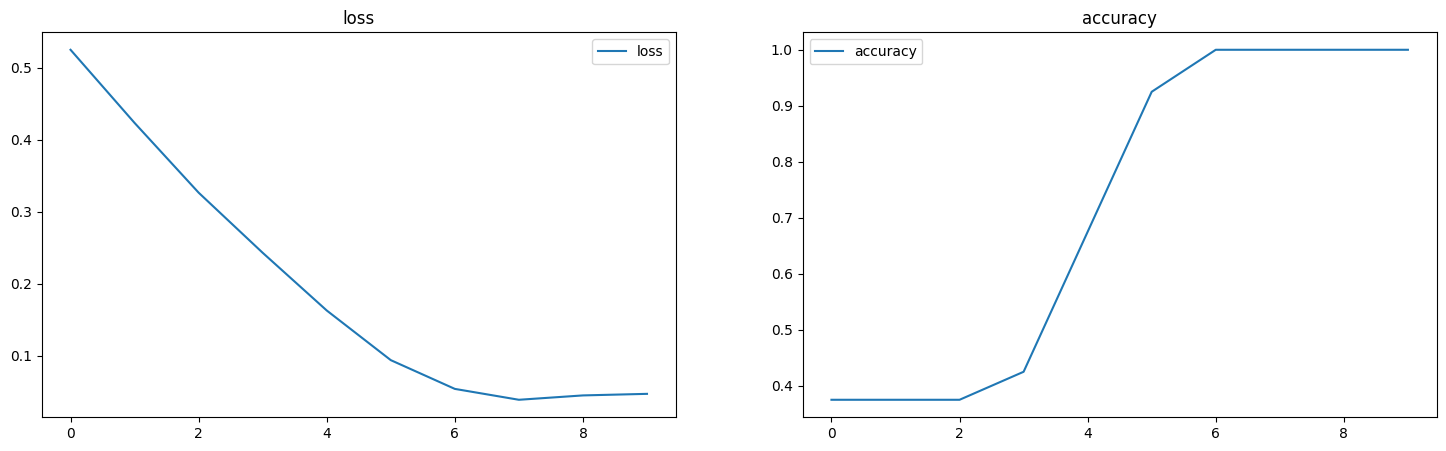

In [151]:
### Usual function for babysit the network
# It is important to systematically observe the learning curves
def babysit(history):
    keys = [key for key in history.keys() if key[:4] != "val_"]
    if len(keys) == 1:  # If there's only one metric apart from its validation metric
        fig, ax = plt.subplots(figsize=(18, 5))
        ax = [ax]  # Make it a list so the indexing works as intended
    else:
        fig, ax = plt.subplots(nrows=1, ncols=len(keys), figsize=(18, 5))
    for i, key in enumerate(keys):
        ax[i].plot(history[key], label=key)
        if "val_" + key in history.keys():
            ax[i].plot(history["val_" + key], label="val_" + key)
        ax[i].legend()
        ax[i].set_title(key)
    plt.show()
babysit(history.history)

In [152]:
print(X1_train.shape)
print(X2_train.shape)

(40, 1880)
(40, 1880)


In [153]:
# Calcul de la perte sur le jeu de données d'entraînement
test_loss = model.evaluate([X1_train, X2_train], y_train)

predictions = model.predict([X1_train, X2_train])
# Décision des étiquettes prédites basée sur un seuil (ici 0.11 comme exemple)
predicted_labels = predictions > 0.3
# Calcul des métriques de performance
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy:", accuracy_score(y_train, predicted_labels))
print("Precision:", precision_score(y_train, predicted_labels))
print("Recall:", recall_score(y_train, predicted_labels))

2/2 [==============================] - 0s 5ms/step
Accuracy: 0.95
Precision: 0.9259259259259259
Recall: 1.0


In [144]:
for i, score in enumerate(predictions.flatten()):
    print(f"Pair {i}: Score = {score}.{pairs_index[i]}")

Pair 0: Score = 0.9998115301132202.(0, 2)
Pair 1: Score = 0.9998291730880737.(0, 3)
Pair 2: Score = 1.0002803802490234.(0, 5)
Pair 3: Score = 0.9999209046363831.(0, 6)
Pair 4: Score = 0.9998841285705566.(0, 13)
Pair 5: Score = 0.9999638199806213.(0, 14)
Pair 6: Score = 0.9996518492698669.(1, 2)
Pair 7: Score = 0.9997951984405518.(1, 3)
Pair 8: Score = 1.000178575515747.(1, 5)
Pair 9: Score = 0.9998635053634644.(1, 6)
Pair 10: Score = 0.9997494220733643.(1, 13)
Pair 11: Score = 0.9999068379402161.(1, 14)
Pair 12: Score = 0.9998424649238586.(2, 0)
Pair 13: Score = 0.9998424649238586.(2, 1)
Pair 14: Score = 0.9999663829803467.(2, 4)
Pair 15: Score = 0.9999745488166809.(2, 8)
Pair 16: Score = 0.9998281002044678.(2, 9)
Pair 17: Score = 0.9999380707740784.(2, 10)
Pair 18: Score = 1.0000066757202148.(2, 12)
Pair 19: Score = 0.9998120665550232.(3, 0)
Pair 20: Score = 0.9998120665550232.(3, 1)
Pair 21: Score = 0.9995594024658203.(3, 4)
Pair 22: Score = 0.9986322522163391.(3, 5)
Pair 23: Score =

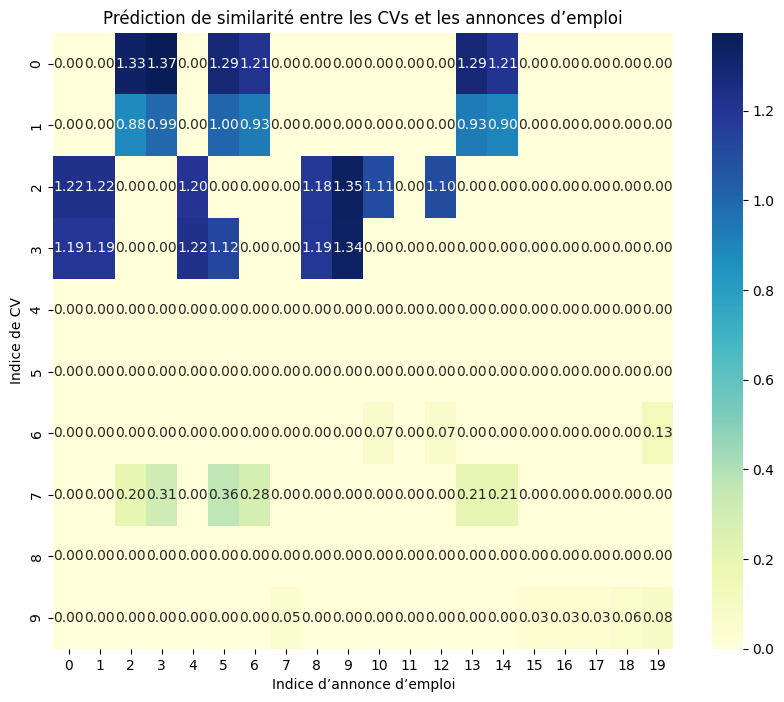

In [154]:
# Aplatir les prédictions et obtenir les indices des paires correspondantes
predictions_aplaties = predictions.flatten()
indices_paires = pairs_index

# Créer une matrice vide pour les scores de similarité
matrice_scores = np.zeros((len(df_cv), len(df_announce)))

# Remplir la matrice avec les scores prédits
for i, (index_cv, index_annonce) in enumerate(indices_paires):
    score = predictions_aplaties[i]
    matrice_scores[index_cv, index_annonce] = score

# Afficher la heatmap pour visualiser la similarité entre chaque CV et chaque annonce d'emploi
plt.figure(figsize=(10, 8))
sns.heatmap(matrice_scores, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Prédiction de similarité entre les CVs et les annonces d’emploi')
plt.xlabel('Indice d’annonce d’emploi')
plt.ylabel('Indice de CV')
plt.show()